In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
!wget -O konsumen.csv https://raw.githubusercontent.com/jumadi-cloud/Fundamental-Python/main/Dataset/konsumen.csv

--2021-10-22 06:00:34--  https://raw.githubusercontent.com/jumadi-cloud/Fundamental-Python/main/Dataset/konsumen.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5340501 (5.1M) [text/plain]
Saving to: ‘konsumen.csv’

konsumen.csv        100%[===================>]   5.09M  --.-KB/s    in 0.06s   

2021-10-22 06:00:34 (82.6 MB/s) - ‘konsumen.csv’ saved [5340501/5340501]



In [ ]:
# Showing data



df = pd.read_csv('konsumen.csv', delimiter=';', skiprows=0, low_memory=False)
df.head()

,SALES DATE,TYPE MOTOR,COLOR,KODE CUSTOMER,JENIS KELAMIN,TANGGAL LAHIR,KECAMATAN SURAT,KOTA SURAT,PROPINSI,STATUS RUMAH,JENIS PENJUALAN STNK,JENIS PENJUALAN SSU,BESAR DP,BESAR CICILAN,LAMA CICILAN,AGAMA,PEKERJAAN,PENGELUARAN,PENDIDIKAN,KEBERSEDIAAN DIHUBUNGI,MERK MOTOR SBLMNYA,TYPE MOTOR SBLMNYA,SMH DIGUNAKAN UNTUK,YG MENGGUNAKAN SMH,HOBI,KETERANGAN,KEWARGANEGARAAN
0,08/08/2019,REVO FIT FI,HITAM,INDIVIDUAL,LAKI-LAKI,25/08/1970,Manyar,Kab. Gresik,Jawa Timur,RUMAH SENDIRI,CASH,CASH,NaN,NaN,NaN,ISLAM,DOKTER,"RP 2.000.001,- S/D RP 3.000.000,-",AKADEMI/DIPLOMA,YES,HONDA,AT AUTOMATIC,BERDAGANG,SAYA SENDIRI,Adventure (Petualangan),NaN,WNI
1,16/10/2019,REVO FIT FI,HITAM,INDIVIDUAL,LAKI-LAKI,31/03/1972,Driyorejo,Kab. Gresik,Jawa Timur,RUMAH SENDIRI,CASH,CASH,NaN,NaN,NaN,ISLAM,"PEGAWAI SWASTA, INDUSTRI","RP 3.000.001,- S/D RP 4.000.000,-",SLTA/SMU,YES,HONDA,SPORT,BERDAGANG,SAYA SENDIRI,Adventure (Petualangan),NaN,WNI
2,07/10/2019,REVO FIT FI,HITAM,INDIVIDUAL,LAKI-LAKI,29/12/1998,Cerme,Kab. Gresik,Jawa Timur,RUMAH ORANG TUA / KELUARGA,CASH,CASH,NaN,NaN,NaN,ISLAM,MAHASISWA / PELAJAR,"RP 1.000.001,- S/D RP 1.500.000,-",SLTA/SMU,YES,HONDA,SPORT,BERDAGANG,SAYA SENDIRI,Adventure (Petualangan),NaN,WNI
3,09/09/2019,REVO FIT FI,HITAM,INDIVIDUAL,LAKI-LAKI,29/01/1983,Menganti,Kab. Gresik,Jawa Timur,RUMAH SENDIRI,CREDIT,CREDIT,1300000.0,634000.0,35.0,ISLAM,"PEGAWAI SWASTA, INDUSTRI","RP 1.000.001,- S/D RP 1.500.000,-",SLTA/SMU,YES,HONDA,AT AUTOMATIC,PEMAKAIAN JARAK DEKAT,SAYA SENDIRI,Makan,SOPAN,WNI
4,07/10/2019,REVO FIT FI,HITAM,INDIVIDUAL,LAKI-LAKI,19/01/1996,Panceng,Kab. Gresik,Jawa Timur,RUMAH SENDIRI,CASH,CASH,NaN,NaN,NaN,ISLAM,MAHASISWA / PELAJAR,"RP 1.000.001,- S/D RP 1.500.000,-",SLTA/SMU,YES,HONDA,SPORT,BERDAGANG,SAYA SENDIRI,Adventure (Petualangan),NaN,WNI


In [ ]:
df.tail()

,SALES DATE,TYPE MOTOR,COLOR,KODE CUSTOMER,JENIS KELAMIN,TANGGAL LAHIR,KECAMATAN SURAT,KOTA SURAT,PROPINSI,STATUS RUMAH,JENIS PENJUALAN STNK,JENIS PENJUALAN SSU,BESAR DP,BESAR CICILAN,LAMA CICILAN,AGAMA,PEKERJAAN,PENGELUARAN,PENDIDIKAN,KEBERSEDIAAN DIHUBUNGI,MERK MOTOR SBLMNYA,TYPE MOTOR SBLMNYA,SMH DIGUNAKAN UNTUK,YG MENGGUNAKAN SMH,HOBI,KETERANGAN,KEWARGANEGARAAN
18611,10/04/2019,CBR 250RR STD,HITAM,INDIVIDUAL,PEREMPUAN,26/11/1984,Wringinanom,Kab. Gresik,Jawa Timur,RUMAH SENDIRI,CASH,CASH,NaN,NaN,NaN,ISLAM,"PEGAWAI SWASTA, JASA","RP 2.000.001,- S/D RP 3.000.000,-",SLTA/SMU,YES,BELUM PERNAH MEMILIKI,BELUM PERNAH MEMILIKI,BERDAGANG,SAYA SENDIRI,Mengarang Cerita,BAIK,WNI
18612,02/08/2019,CBR 250RR ABS,HITAM,INDIVIDUAL,LAKI-LAKI,14/02/1994,Gresik,Kab. Gresik,Jawa Timur,RUMAH SEWA,CREDIT,CASH,NaN,NaN,NaN,ISLAM,"PEGAWAI SWASTA, INDUSTRI","RP 1.000.001,- S/D RP 1.500.000,-",SLTA/SMU,YES,YAMAHA,AT AUTOMATIC,LAIN-LAIN,PASANGAN SUAMI ATAU ISTRI,Membaca,NaN,WNI
18613,29/07/2019,CBR 250RR ABS,MERAH,INDIVIDUAL,LAKI-LAKI,23/06/1998,Benjeng,Kab. Gresik,Jawa Timur,RUMAH ORANG TUA / KELUARGA,CASH,CASH,NaN,NaN,NaN,ISLAM,"PEGAWAI SWASTA, INDUSTRI","RP 700.001,- S/D RP 1.000.000,-",SLTA/SMU,YES,HONDA,CUB BEBEK,BERDAGANG,SAYA SENDIRI,Adventure (Petualangan),NaN,WNI
18614,15/03/2019,SUPER CUB C125,BIRU-PUTIH,INDIVIDUAL,LAKI-LAKI,18/08/1992,Kebomas,Kab. Gresik,Jawa Timur,RUMAH ORANG TUA / KELUARGA,CREDIT,CASH,NaN,NaN,NaN,ISLAM,"PEGAWAI SWASTA, INDUSTRI","RP 2.000.001,- S/D RP 3.000.000,-",AKADEMI/DIPLOMA,YES,HONDA,AT AUTOMATIC,BERDAGANG,SAYA SENDIRI,Makan,NaN,WNI
18615,10/04/2019,SUPER CUB C125,BIRU-PUTIH,INDIVIDUAL,LAKI-LAKI,06/07/1986,Manyar,Kab. Gresik,Jawa Timur,RUMAH SENDIRI,CASH,CASH,NaN,NaN,NaN,ISLAM,"PEGAWAI SWASTA, PERDAGANGAN (RETAIL)","RP 2.000.001,- S/D RP 3.000.000,-",AKADEMI/DIPLOMA,NO,HONDA,AT AUTOMATIC,KEBUTUHAN KELUARGA,SAYA SENDIRI,Menanam Bunga,NaN,WNI


In [ ]:
df = df.rename({'TYPE MOTOR':'MOTOR'}, axis=1)

# EXPLORATORY DATA ANALYS

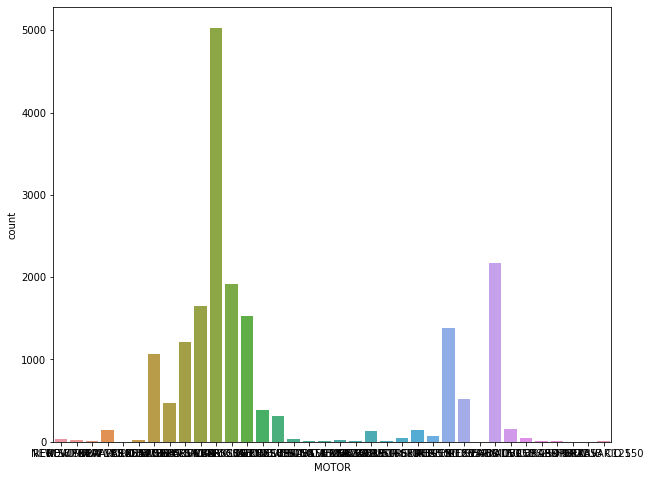

In [ ]:
# Visualisasikan kolom motor
dims = (10, 8)
fig, ax = plt.subplots(figsize=dims)
ax = sns.countplot(x=df.MOTOR)

In [ ]:
  #For Search duplicate Row

  df.duplicated().sum()

7210

In [ ]:
df.isna().sum()

SALES DATE                    0
MOTOR                         0
COLOR                         0
KODE CUSTOMER                 0
JENIS KELAMIN                 0
TANGGAL LAHIR                 0
KECAMATAN SURAT               0
KOTA SURAT                    0
PROPINSI                      0
STATUS RUMAH                  0
JENIS PENJUALAN STNK          0
JENIS PENJUALAN SSU           0
BESAR DP                   7688
BESAR CICILAN              7688
LAMA CICILAN               7688
AGAMA                         0
PEKERJAAN                     0
PENGELUARAN                   0
PENDIDIKAN                    0
KEBERSEDIAAN DIHUBUNGI        0
MERK MOTOR SBLMNYA            0
TYPE MOTOR SBLMNYA            0
SMH DIGUNAKAN UNTUK           0
YG MENGGUNAKAN SMH            0
HOBI                          0
KETERANGAN                11354
KEWARGANEGARAAN               6
dtype: int64

In [ ]:
df.shape

(18616, 27)

In [ ]:
df.head()

,SALES DATE,MOTOR,COLOR,KODE CUSTOMER,JENIS KELAMIN,TANGGAL LAHIR,KECAMATAN SURAT,KOTA SURAT,PROPINSI,STATUS RUMAH,JENIS PENJUALAN STNK,JENIS PENJUALAN SSU,BESAR DP,BESAR CICILAN,LAMA CICILAN,AGAMA,PEKERJAAN,PENGELUARAN,PENDIDIKAN,KEBERSEDIAAN DIHUBUNGI,MERK MOTOR SBLMNYA,TYPE MOTOR SBLMNYA,SMH DIGUNAKAN UNTUK,YG MENGGUNAKAN SMH,HOBI,KETERANGAN,KEWARGANEGARAAN
0,08/08/2019,REVO FIT FI,HITAM,INDIVIDUAL,LAKI-LAKI,25/08/1970,Manyar,Kab. Gresik,Jawa Timur,RUMAH SENDIRI,CASH,CASH,NaN,NaN,NaN,ISLAM,DOKTER,"RP 2.000.001,- S/D RP 3.000.000,-",AKADEMI/DIPLOMA,YES,HONDA,AT AUTOMATIC,BERDAGANG,SAYA SENDIRI,Adventure (Petualangan),NaN,WNI
1,16/10/2019,REVO FIT FI,HITAM,INDIVIDUAL,LAKI-LAKI,31/03/1972,Driyorejo,Kab. Gresik,Jawa Timur,RUMAH SENDIRI,CASH,CASH,NaN,NaN,NaN,ISLAM,"PEGAWAI SWASTA, INDUSTRI","RP 3.000.001,- S/D RP 4.000.000,-",SLTA/SMU,YES,HONDA,SPORT,BERDAGANG,SAYA SENDIRI,Adventure (Petualangan),NaN,WNI
2,07/10/2019,REVO FIT FI,HITAM,INDIVIDUAL,LAKI-LAKI,29/12/1998,Cerme,Kab. Gresik,Jawa Timur,RUMAH ORANG TUA / KELUARGA,CASH,CASH,NaN,NaN,NaN,ISLAM,MAHASISWA / PELAJAR,"RP 1.000.001,- S/D RP 1.500.000,-",SLTA/SMU,YES,HONDA,SPORT,BERDAGANG,SAYA SENDIRI,Adventure (Petualangan),NaN,WNI
3,09/09/2019,REVO FIT FI,HITAM,INDIVIDUAL,LAKI-LAKI,29/01/1983,Menganti,Kab. Gresik,Jawa Timur,RUMAH SENDIRI,CREDIT,CREDIT,1300000.0,634000.0,35.0,ISLAM,"PEGAWAI SWASTA, INDUSTRI","RP 1.000.001,- S/D RP 1.500.000,-",SLTA/SMU,YES,HONDA,AT AUTOMATIC,PEMAKAIAN JARAK DEKAT,SAYA SENDIRI,Makan,SOPAN,WNI
4,07/10/2019,REVO FIT FI,HITAM,INDIVIDUAL,LAKI-LAKI,19/01/1996,Panceng,Kab. Gresik,Jawa Timur,RUMAH SENDIRI,CASH,CASH,NaN,NaN,NaN,ISLAM,MAHASISWA / PELAJAR,"RP 1.000.001,- S/D RP 1.500.000,-",SLTA/SMU,YES,HONDA,SPORT,BERDAGANG,SAYA SENDIRI,Adventure (Petualangan),NaN,WNI


In [ ]:
df = df.rename({'SALES DATE':'SALES'}, axis=1)

In [ ]:
  df.head()

,SALES,MOTOR,COLOR,KODE CUSTOMER,JENIS KELAMIN,TANGGAL LAHIR,KECAMATAN SURAT,KOTA SURAT,PROPINSI,STATUS RUMAH,JENIS PENJUALAN STNK,JENIS PENJUALAN SSU,BESAR DP,BESAR CICILAN,LAMA CICILAN,AGAMA,PEKERJAAN,PENGELUARAN,PENDIDIKAN,KEBERSEDIAAN DIHUBUNGI,MERK MOTOR SBLMNYA,TYPE MOTOR SBLMNYA,SMH DIGUNAKAN UNTUK,YG MENGGUNAKAN SMH,HOBI,KETERANGAN,KEWARGANEGARAAN
0,08/08/2019,REVO FIT FI,HITAM,INDIVIDUAL,LAKI-LAKI,25/08/1970,Manyar,Kab. Gresik,Jawa Timur,RUMAH SENDIRI,CASH,CASH,NaN,NaN,NaN,ISLAM,DOKTER,"RP 2.000.001,- S/D RP 3.000.000,-",AKADEMI/DIPLOMA,YES,HONDA,AT AUTOMATIC,BERDAGANG,SAYA SENDIRI,Adventure (Petualangan),NaN,WNI
1,16/10/2019,REVO FIT FI,HITAM,INDIVIDUAL,LAKI-LAKI,31/03/1972,Driyorejo,Kab. Gresik,Jawa Timur,RUMAH SENDIRI,CASH,CASH,NaN,NaN,NaN,ISLAM,"PEGAWAI SWASTA, INDUSTRI","RP 3.000.001,- S/D RP 4.000.000,-",SLTA/SMU,YES,HONDA,SPORT,BERDAGANG,SAYA SENDIRI,Adventure (Petualangan),NaN,WNI
2,07/10/2019,REVO FIT FI,HITAM,INDIVIDUAL,LAKI-LAKI,29/12/1998,Cerme,Kab. Gresik,Jawa Timur,RUMAH ORANG TUA / KELUARGA,CASH,CASH,NaN,NaN,NaN,ISLAM,MAHASISWA / PELAJAR,"RP 1.000.001,- S/D RP 1.500.000,-",SLTA/SMU,YES,HONDA,SPORT,BERDAGANG,SAYA SENDIRI,Adventure (Petualangan),NaN,WNI
3,09/09/2019,REVO FIT FI,HITAM,INDIVIDUAL,LAKI-LAKI,29/01/1983,Menganti,Kab. Gresik,Jawa Timur,RUMAH SENDIRI,CREDIT,CREDIT,1300000.0,634000.0,35.0,ISLAM,"PEGAWAI SWASTA, INDUSTRI","RP 1.000.001,- S/D RP 1.500.000,-",SLTA/SMU,YES,HONDA,AT AUTOMATIC,PEMAKAIAN JARAK DEKAT,SAYA SENDIRI,Makan,SOPAN,WNI
4,07/10/2019,REVO FIT FI,HITAM,INDIVIDUAL,LAKI-LAKI,19/01/1996,Panceng,Kab. Gresik,Jawa Timur,RUMAH SENDIRI,CASH,CASH,NaN,NaN,NaN,ISLAM,MAHASISWA / PELAJAR,"RP 1.000.001,- S/D RP 1.500.000,-",SLTA/SMU,YES,HONDA,SPORT,BERDAGANG,SAYA SENDIRI,Adventure (Petualangan),NaN,WNI


# Data Preparation


In [ ]:
df = df.drop(columns=['BESAR DP', 'BESAR CICILAN', 'LAMA CICILAN', 'KETERANGAN','SALES', 'TANGGAL LAHIR'])

In [ ]:
df.isna().sum()

MOTOR                     0
COLOR                     0
KODE CUSTOMER             0
JENIS KELAMIN             0
KECAMATAN SURAT           0
KOTA SURAT                0
PROPINSI                  0
STATUS RUMAH              0
JENIS PENJUALAN STNK      0
JENIS PENJUALAN SSU       0
AGAMA                     0
PEKERJAAN                 0
PENGELUARAN               0
PENDIDIKAN                0
KEBERSEDIAAN DIHUBUNGI    0
MERK MOTOR SBLMNYA        0
TYPE MOTOR SBLMNYA        0
SMH DIGUNAKAN UNTUK       0
YG MENGGUNAKAN SMH        0
HOBI                      0
KEWARGANEGARAAN           6
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

MOTOR                     0
COLOR                     0
KODE CUSTOMER             0
JENIS KELAMIN             0
KECAMATAN SURAT           0
KOTA SURAT                0
PROPINSI                  0
STATUS RUMAH              0
JENIS PENJUALAN STNK      0
JENIS PENJUALAN SSU       0
AGAMA                     0
PEKERJAAN                 0
PENGELUARAN               0
PENDIDIKAN                0
KEBERSEDIAAN DIHUBUNGI    0
MERK MOTOR SBLMNYA        0
TYPE MOTOR SBLMNYA        0
SMH DIGUNAKAN UNTUK       0
YG MENGGUNAKAN SMH        0
HOBI                      0
KEWARGANEGARAAN           0
dtype: int64

In [ ]:
#Mengencode Data Kategorikal

list_1=list(df.columns)

In [ ]:
list_cate=[]
for i in list_1:
    if df[i].dtype=='object':
        list_cate.append(i)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
for i in list_cate:
    df[i]=le.fit_transform(df[i])

In [ ]:
df

,MOTOR,COLOR,KODE CUSTOMER,JENIS KELAMIN,KECAMATAN SURAT,KOTA SURAT,PROPINSI,STATUS RUMAH,JENIS PENJUALAN STNK,JENIS PENJUALAN SSU,AGAMA,PEKERJAAN,PENGELUARAN,PENDIDIKAN,KEBERSEDIAAN DIHUBUNGI,MERK MOTOR SBLMNYA,TYPE MOTOR SBLMNYA,SMH DIGUNAKAN UNTUK,YG MENGGUNAKAN SMH,HOBI,KEWARGANEGARAAN
0,30,5,0,0,10,0,0,1,0,0,2,0,4,0,1,1,0,1,3,0,0
1,30,5,0,0,4,0,0,1,0,0,2,8,5,4,1,1,3,1,3,0,0
2,30,5,0,0,3,0,0,0,0,0,2,4,2,4,1,1,3,1,3,0,0
3,30,5,0,0,11,0,0,1,1,1,2,8,2,4,1,1,0,5,3,20,0
4,30,5,0,0,12,0,0,1,0,0,2,4,2,4,1,1,3,1,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18611,15,5,0,1,18,0,0,1,0,0,2,9,4,4,1,0,1,1,3,34,0
18612,14,5,0,0,7,0,0,2,1,0,2,8,2,4,1,5,0,4,2,25,0
18613,14,11,0,0,1,0,0,0,0,0,2,8,6,4,1,1,2,1,3,0,0
18614,31,2,0,0,8,0,0,0,1,0,2,8,4,0,1,1,0,1,3,20,0


In [ ]:
df.value_counts()

MOTOR  COLOR  KODE CUSTOMER  JENIS KELAMIN  KECAMATAN SURAT  KOTA SURAT  PROPINSI  STATUS RUMAH  JENIS PENJUALAN STNK  JENIS PENJUALAN SSU  AGAMA  PEKERJAAN  PENGELUARAN  PENDIDIKAN  KEBERSEDIAAN DIHUBUNGI  MERK MOTOR SBLMNYA  TYPE MOTOR SBLMNYA  SMH DIGUNAKAN UNTUK  YG MENGGUNAKAN SMH  HOBI  KEWARGANEGARAAN
3      12     0              1              4                0           0         1             1                     1                    2      8          4            4           1                       1                   3                   1                    3                   0     0                  17
       4      0              1              8                0           0         1             0                     0                    2      2          4            4           1                       1                   2                   5                    3                   24    0                  11
       12     0              0              4             

# Splitting Data

In [ ]:
y=df['MOTOR']
x=df.drop('MOTOR',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)


In [ ]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

14888
3722
14888
3722


**1. KNN**

By default, the KNeighborsClassifier looks for the 5 nearest neighbors. We must explicitly tell the classifier to use Euclidean distance for determining the proximity between neighboring points

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)

knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [ ]:
y_pred=knn.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",knn.score(x_train,y_train)*100)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report is:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.03      0.04      0.03        27
           2       0.00      0.00      0.00         1
           3       0.46      0.69      0.55      1014
           4       0.33      0.25      0.29         8
           5       0.00      0.00      0.00         1
           6       0.36      0.38      0.37       316
           7       0.32      0.24      0.27       245
           8       0.24      0.24      0.24       216
           9       0.24      0.20      0.22       100
          10       0.00      0.00      0.00         4
          11       0.00      0.00      0.00         1
          12       0.17      0.14      0.15        22
          13       0.00      0.00      0.00         4
          14       0.20      0.50      0.29         2
          16       0.00      0.00      0.00        14
          18       0.36      0.18      0.24        74


**2. SVC**

In machine learning, support-vector machines (SVMs, also support-vector networks) are supervised learning models with associated learning algorithms that analyze data for classification and regression analysis.

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC()
svc.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred=svc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",svc.score(x_train,y_train)*100)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report is:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00        27
           2       0.00      0.00      0.00         1
           3       0.29      0.99      0.45      1014
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00       316
           7       0.00      0.00      0.00       245
           8       0.00      0.00      0.00       216
           9       0.00      0.00      0.00       100
          10       0.00      0.00      0.00         4
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00        22
          13       0.00      0.00      0.00         4
          14       0.00      0.00      0.00         2
          16       0.00      0.00      0.00        14
          18       0.00      0.00      0.00        74


**3. Naive Bayes**

It is a classification technique based on Bayes' Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred=gnb.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",gnb.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.04      0.33      0.08         6
           1       0.00      0.00      0.00        27
           2       0.03      1.00      0.07         1
           3       0.16      0.00      0.01      1014
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00       316
           7       0.00      0.00      0.00       245
           8       0.00      0.00      0.00       216
           9       0.00      0.00      0.00       100
          10       0.00      0.00      0.00         4
          11       0.00      1.00      0.01         1
          12       0.00      0.00      0.00        22
          13       0.02      0.50      0.04         4
          14       0.00      0.50      0.01         2
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00        14


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**4. Decision Tree Classifier**

Decision trees use multiple algorithms to decide to split a node into two or more sub-nodes. The creation of sub-nodes increases the homogeneity of resultant sub-nodes. ... The decision tree splits the nodes on all available variables and then selects the split which results in most homogeneous sub-nodes

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=6, random_state=123,criterion='entropy')

dtree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [ ]:
y_pred=dtree.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",dtree.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00        27
           2       0.00      0.00      0.00         1
           3       0.87      0.90      0.89      1014
           4       0.75      0.38      0.50         8
           5       0.00      0.00      0.00         1
           6       0.93      0.67      0.78       316
           7       1.00      0.55      0.71       245
           8       0.28      0.09      0.13       216
           9       0.42      0.30      0.35       100
          10       0.00      0.00      0.00         4
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00        22
          13       0.00      0.00      0.00         4
          14       0.00      0.00      0.00         2
          16       0.00      0.00      0.00        14
          18       0.44      0.46      0.45        74


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**5. Random Forest Classifier**

A random forest classifier. A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred=rfc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",rfc.score(x_train,y_train)*100)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report is:
               precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.68      0.56      0.61        27
           2       1.00      1.00      1.00         1
           3       0.84      0.93      0.88      1014
           4       0.86      0.75      0.80         8
           5       0.00      0.00      0.00         1
           6       0.82      0.80      0.81       316
           7       0.88      0.75      0.81       245
           8       0.66      0.61      0.63       216
           9       0.74      0.52      0.61       100
          10       0.75      0.75      0.75         4
          11       1.00      1.00      1.00         1
          12       0.79      0.68      0.73        22
          13       0.00      0.00      0.00         4
          14       1.00      1.00      1.00         2
          16       0.75      0.64      0.69        14
          17       0.00      0.00      0.00         0


**6. AdaBoost Classifier**

An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(base_estimator = None)
adb.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [ ]:
y_pred=adb.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",adb.score(x_train,y_train)*100)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report is:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00        27
           2       0.00      0.00      0.00         1
           3       0.29      1.00      0.45      1014
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00       316
           7       0.00      0.00      0.00       245
           8       0.00      0.00      0.00       216
           9       0.00      0.00      0.00       100
          10       0.00      0.00      0.00         4
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00        22
          13       0.00      0.00      0.00         4
          14       0.00      0.00      0.00         2
          16       0.00      0.00      0.00        14
          18       0.00      0.00      0.00        74


**7. Gradient Boosting Classifier**

Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model. Decision trees are usually used when doing gradient boosting.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
y_pred=gbc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",gbc.score(x_train,y_train)*100)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report is:
               precision    recall  f1-score   support

           0       0.50      0.17      0.25         6
           1       0.29      0.07      0.12        27
           2       1.00      1.00      1.00         1
           3       0.83      0.92      0.87      1014
           4       0.80      0.50      0.62         8
           5       0.00      0.00      0.00         1
           6       0.84      0.68      0.75       316
           7       1.00      0.56      0.71       245
           8       0.32      0.33      0.33       216
           9       0.53      0.16      0.25       100
          10       0.00      0.00      0.00         4
          11       1.00      1.00      1.00         1
          12       0.50      0.27      0.35        22
          13       0.00      0.00      0.00         4
          14       0.50      0.50      0.50         2
          16       0.40      0.14      0.21        14
          18       0.69      0.39      0.50        74


In [ ]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data

,Actual,Predicted
16106,33,33
230,8,8
18019,35,27
6847,8,33
15130,3,3
...,...,...
4674,19,33
9865,3,3
4685,19,19
8441,3,8


**8. XGB Classifier**

XGBoost is a popular and efficient open-source implementation of the gradient boosted trees algorithm. Gradient boosting is a supervised learning algorithm, which attempts to accurately predict a target variable by combining the estimates of a set of simpler, weaker models.

In [ ]:
from xgboost import XGBClassifier

xgb =XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xgb.fit(x_train, y_train)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred=xgb.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",xgb.score(x_train,y_train)*100)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report is:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00        27
           2       0.00      0.00      0.00         1
           3       0.45      0.99      0.62      1014
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00         1
           6       0.91      0.67      0.78       316
           7       1.00      0.55      0.71       245
           8       0.45      0.02      0.04       216
           9       0.59      0.23      0.33       100
          10       0.00      0.00      0.00         4
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00        22
          13       0.00      0.00      0.00         4
          14       0.00      0.00      0.00         2
          16       0.00      0.00      0.00        14
          18       0.72      0.31      0.43        74


 **9. Extra Trees Classifier**

Extremely Randomized Trees Classifier(Extra Trees Classifier) is a type of ensemble learning technique which aggregates the results of multiple de-correlated decision trees collected in a “forest” to output it's classification result

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=100, random_state=0)
etc.fit(x_train,y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=0, verbose=0,
                     warm_start=False)

In [ ]:
y_pred=etc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",etc.score(x_train,y_train)*100)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report is:
               precision    recall  f1-score   support

           0       0.57      0.67      0.62         6
           1       0.60      0.67      0.63        27
           2       1.00      1.00      1.00         1
           3       0.83      0.93      0.88      1014
           4       0.75      0.75      0.75         8
           5       0.00      0.00      0.00         1
           6       0.80      0.82      0.81       316
           7       0.88      0.72      0.79       245
           8       0.67      0.63      0.65       216
           9       0.69      0.56      0.62       100
          10       0.75      0.75      0.75         4
          11       1.00      1.00      1.00         1
          12       0.71      0.68      0.70        22
          13       0.00      0.00      0.00         4
          14       1.00      1.00      1.00         2
          16       0.69      0.64      0.67        14
          17       0.00      0.00      0.00         0


**10. Bagging Classifier**

Extremely Randomized Trees Classifier(Extra Trees Classifier) is a type of ensemble learning technique which aggregates the results of multiple de-correlated decision trees collected in a “forest” to output it's classification result

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.7718968296614723

In [ ]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data

,Actual,Predicted
16106,33,33
230,8,8
18019,35,27
6847,8,19
15130,3,3
...,...,...
4674,19,19
9865,3,3
4685,19,19
8441,3,8


# RANDOM FOREST CLASSIFIER

In [2]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)

y_pred=clf.predict(X_test)

NameError: ignored

In [ ]:
df.head()

,MOTOR,COLOR,KODE CUSTOMER,JENIS KELAMIN,KECAMATAN SURAT,KOTA SURAT,PROPINSI,STATUS RUMAH,JENIS PENJUALAN STNK,JENIS PENJUALAN SSU,AGAMA,PEKERJAAN,PENGELUARAN,PENDIDIKAN,KEBERSEDIAAN DIHUBUNGI,MERK MOTOR SBLMNYA,TYPE MOTOR SBLMNYA,SMH DIGUNAKAN UNTUK,YG MENGGUNAKAN SMH,HOBI,KEWARGANEGARAAN
0,30,5,0,0,10,0,0,1,0,0,2,0,4,0,1,1,0,1,3,0,0
1,30,5,0,0,4,0,0,1,0,0,2,8,5,4,1,1,3,1,3,0,0
2,30,5,0,0,3,0,0,0,0,0,2,4,2,4,1,1,3,1,3,0,0
3,30,5,0,0,11,0,0,1,1,1,2,8,2,4,1,1,0,5,3,20,0
4,30,5,0,0,12,0,0,1,0,0,2,4,2,4,1,1,3,1,3,0,0
